In [ ]:
import os
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data_path=(r'/content/drive/My Drive/animal')

data=np.load(os.path.join(data_path, 'data.npy'))
target=np.load(os.path.join(data_path, 'target.npy')) #load the saved model

print(data.shape)
print(target.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(4000, 50, 50, 1)
(4000, 2)


In [10]:
print(data.shape)
print(target.shape)

(4000, 50, 50, 1)
(4000, 2)


In [11]:
print(data.shape[1:])

(50, 50, 1)


In [12]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Activation

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:],padding='same')) #3*3 sized 128 kernals
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))

model.add(Dense(target.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281,060 (1.07 MB)

 Trainable params: 281,060 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history=model.fit(data,target,epochs=10,validation_split=0.2,batch_size=32)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 639ms/step - accuracy: 0.6253 - loss: 0.6617 - val_accuracy: 0.0000e+00 - val_loss: 0.9557
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 636ms/step - accuracy: 0.6249 - loss: 0.6622 - val_accuracy: 0.0000e+00 - val_loss: 0.9572
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 84s 663ms/step - accuracy: 0.6141 - loss: 0.6675 - val_accuracy: 0.0000e+00 - val_loss: 1.0034
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 80s 644ms/step - accuracy: 0.6255 - loss: 0.6615 - val_accuracy: 0.0000e+00 - val_loss: 0.9842
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 647ms/step - accuracy: 0.6399 - loss: 0.6541 - val_accuracy: 0.0000e+00 - val_loss: 0.9424
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 638ms/step - accuracy: 0.6386 - loss: 0.6555 - val_accuracy: 0.0000e+00 - val_loss: 0.9458
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 630ms/step - accuracy: 0.6119 - loss: 0.6680 - val_accuracy: 0.0000e+00 - val_loss: 1.0281
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 84s 649ms/step 

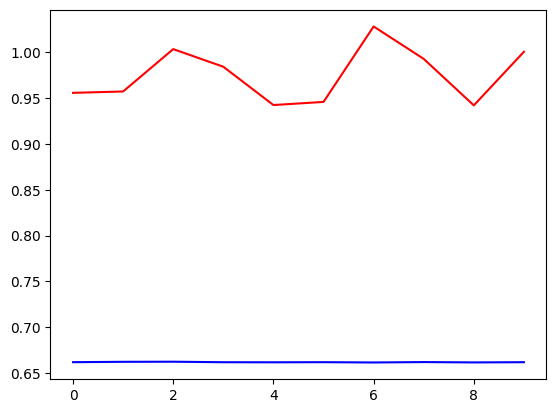

In [16]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')

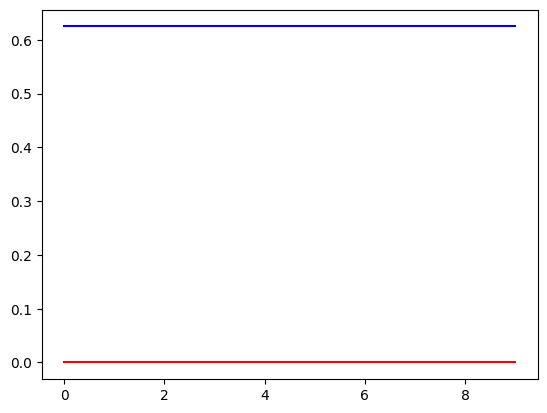

In [18]:
plt.plot(history.history['accuracy'],'b')
plt.plot(history.history['val_accuracy'],'r')